<a href="https://colab.research.google.com/github/vananya12/GEN-AI-Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision numpy opencv-python matplotlib deepface tensorflow


In [2]:
import torch
import torchvision.transforms as transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from tensorflow.keras.models import load_model

In [3]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
from google.colab import files
uploaded = files.upload()

Saving ChatGPT Image Apr 4, 2025, 10_16_31 PM.png to ChatGPT Image Apr 4, 2025, 10_16_31 PM (3).png


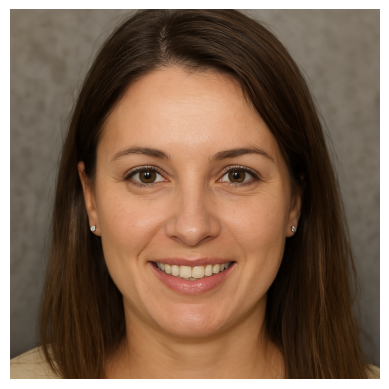

In [5]:
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
# Preprocessing for deep learning models
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
input_image = transform(image).unsqueeze(0)

In [7]:
analysis = DeepFace.analyze(image_path, actions=['emotion'], enforce_detection=False)
print(analysis)

[{'emotion': {'angry': 1.0231085943723794e-09, 'disgust': 2.656931786372057e-17, 'fear': 2.6441040112609726e-11, 'happy': 96.94303870201111, 'sad': 8.531952921941865e-07, 'surprise': 8.00372447429254e-05, 'neutral': 3.0568838119506836}, 'dominant_emotion': 'happy', 'region': {'x': 150, 'y': 196, 'w': 676, 'h': 676, 'left_eye': (621, 462), 'right_eye': (368, 461)}, 'face_confidence': 0.88}]


In [8]:
with torch.no_grad():
    output = model(input_image)
    prediction = torch.argmax(output, dim=1).item()

if prediction == 0:
    print("Real Image")
else:
    print("Deepfake Detected!")

Deepfake Detected!


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer

# Build and save a sample model in Colab
model = Sequential([
    InputLayer(input_shape=(299, 299, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.save("deepfake_model.h5")

In [21]:
import keras
deepfake_model = keras.models.load_model("deepfake_model.h5", compile=False)

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Make prediction
prediction = deepfake_model.predict(img_array)
print("Prediction:", prediction)

# Interpret prediction (since it's binary)
if prediction[0][0] > 0.5:
    print("🧠 The image is likely a **Deepfake**.")
else:
    print("✅ The image is likely **Real**.")

1/1 [==============================] - 0s 340ms/step
Prediction: [[0.44546556]]
✅ The image is likely **Real**.
